In [46]:
import pandas as pd

df = pd.read_csv("../../_Data/ITHS_machine_learning_lab/cardio_train.csv", sep = ";")

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  int64   
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  int64   
 8   gluc         70000 non-null  int64   
 9   smoke        70000 non-null  int64   
 10  alco         70000 non-null  int64   
 11  active       70000 non-null  int64   
 12  cardio       70000 non-null  int64   
 13  cardio_cat   70000 non-null  category
dtypes: category(1), float64(1), int64(12)
memory usage: 7.0 MB


In [27]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: ylabel='cholesterol'>

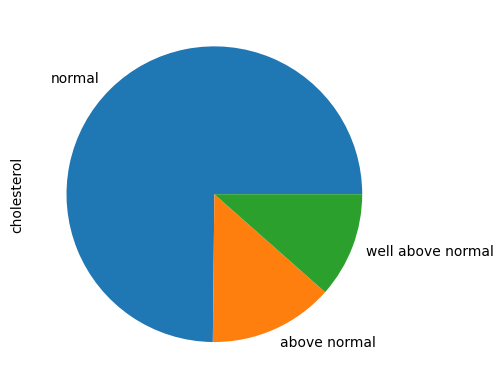

In [50]:
df["cholesterol"].value_counts().plot(kind = "pie", labels = ["normal", "above normal", "well above normal"])

In [53]:
df["age_years"] = df["age"] / 365

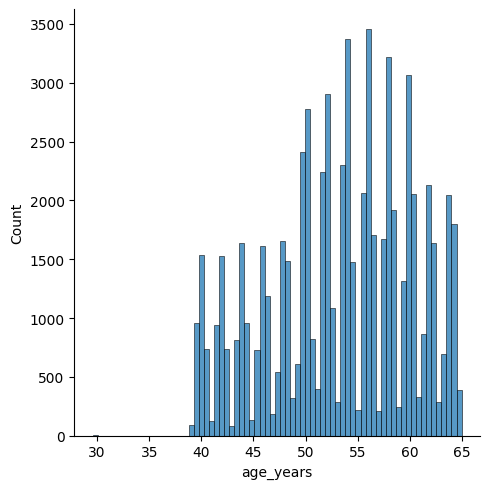

In [63]:
import seaborn as sns

sns.displot(df["age_years"])

In [65]:
df["smoke"].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

<Axes: xlabel='height', ylabel='Count'>

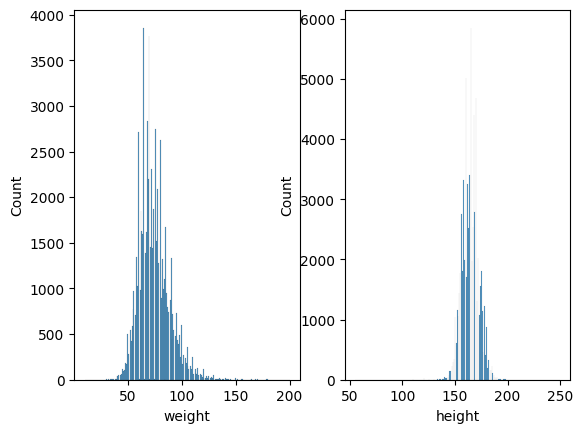

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)

sns.histplot(df["weight"], ax = ax[0])
sns.histplot(df["height"], ax = ax[1])

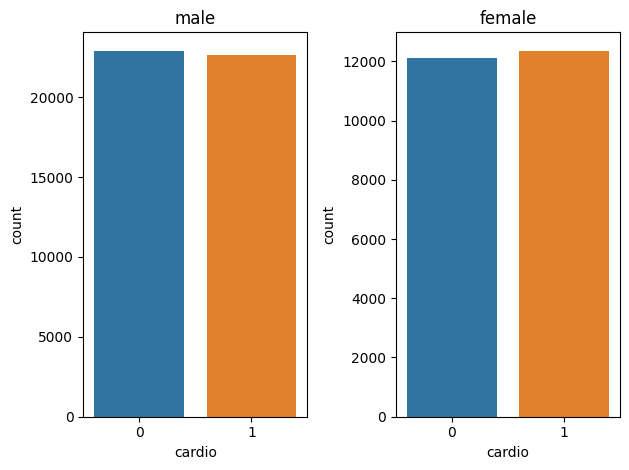

In [249]:
# print(df["gender"].value_counts())

fig, ax = plt.subplots(1,2)

lst = ["male", "female"]

for i in range(2):
    df_ = df[df["gender"] == i+1]
    sns.countplot(data= df_, x="cardio", ax=ax[i])
    ax[i].set_title(lst[i])

fig.tight_layout()
# sns.barplot()

## 2.1.0 Feature engineering BMI

In [156]:
df["bmi"] = df["weight"] / (df["height"]/100)**2

<Axes: xlabel='bmi', ylabel='Count'>

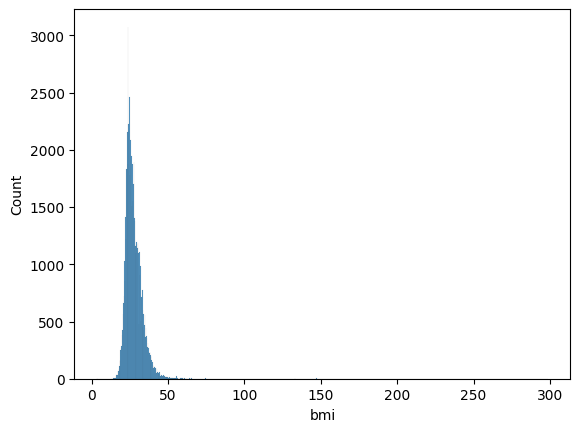

In [159]:
sns.histplot(df["bmi"])

<Axes: >

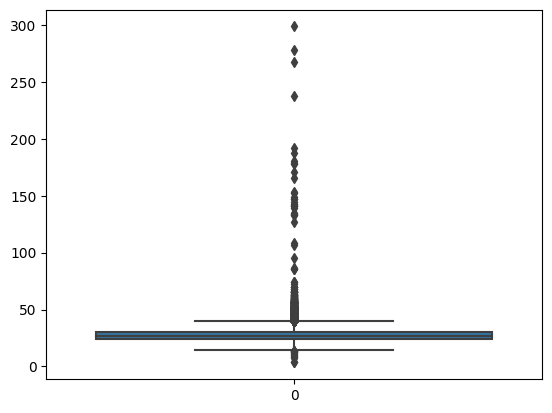

In [162]:
sns.boxplot(df["bmi"])

In [196]:
q1 = df["bmi"].quantile(0.25)
q3= df["bmi"].quantile(0.75)
iqr = q3-q1

q1 - 1.7*iqr, q3 + 1.7*iqr

(13.085032139577603, 41.012304866850315)

In [192]:
df[df["bmi"].between(39, 41)]["bmi"].count()
df.query('39 < bmi < 41')["bmi"].count()


891

(12.682860022911978, 41.905536328835154)

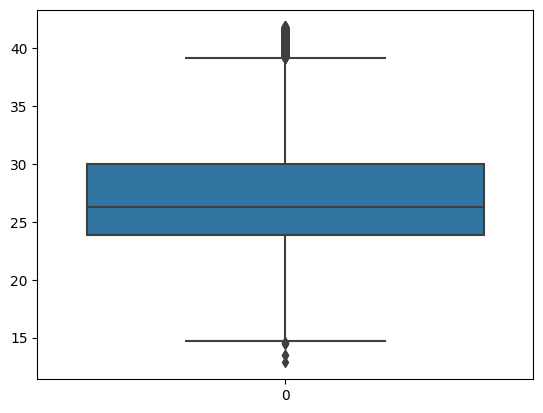

In [247]:
# using 3 stdev instead of IQR because we want the full normal distribution

lst = ["height", "weight", "bmi"]
filtered_df = df

for i in lst:
    upper = filtered_df[i].mean() + 3 * filtered_df[i].std()
    lower = filtered_df[i].mean() - 3 * filtered_df[i].std()

    filtered_df = filtered_df[filtered_df[i].between(lower, upper)]

sns.boxplot(filtered_df["bmi"])


lower, upper # (13, 42) seems reasonable

<Axes: xlabel='bmi', ylabel='Count'>

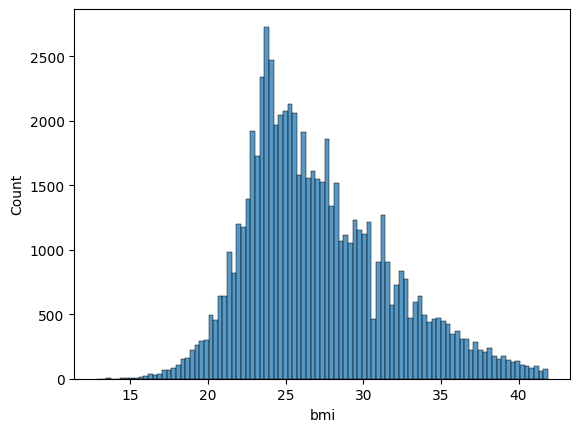

In [248]:
# positive skew which is in line with previously observed distributions of bmi
sns.histplot(filtered_df["bmi"])